<a href="https://colab.research.google.com/github/Priyam8210/CyberLab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
train_data = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emnist-letters-train.csv"))
test_data = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emnist-letters-test.csv"))

In [105]:
train_data.head()


,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test_data.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
train_data.isnull().sum()

23       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.411    0
0.412    0
0.413    0
0.414    0
0.415    0
Length: 785, dtype: int64

In [108]:
train_data.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,...,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [109]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, 23 to 0.415
dtypes: int64(785)
memory usage: 531.8 MB
None


In [110]:
train_data = pd.get_dummies(train_data, columns =['23'])
test_data= pd.get_dummies(test_data,columns =['1'])


In [111]:
train_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,23_17,23_18,23_19,23_20,23_21,23_22,23_23,23_24,23_25,23_26
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [112]:
test_data.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [114]:
X_train = train_data[:, :784]
X_test = test_data[:,:784]

Y_train = train_data[:, 784:]
Y_test = test_data[:, 784:]






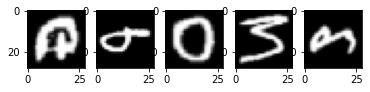

In [115]:
#showing image of first 5 example
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_train[i, :].reshape(28,28), cmap='gray')

In [116]:
print(Y_train.shape)
print(Y_test.shape)

(88799, 26)
(14799, 19)


In [117]:
np.min(Y_train, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
np.max(Y_train, axis=1)

array([1, 1, 1, ..., 1, 1, 1])

In [119]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [120]:
print(X_train.shape)

(88799, 784)


In [121]:
m1 = len(X_train)

X = np.concatenate((np.random.randn(m1,1), X_train), axis=1)
n1 = np.size(X_train,1)
n2 = np.size(Y_train,1)



In [122]:
# training model
def train_logistic(X_train, Y_train, alpha, no_of_iteration):

  m = len(X_train)
  n = np.size(X_train,1)
  theata = np.zeros((n,26))

  for i in range(no_of_iteration):
    #defining hypothesis
    z = X_train@theata
    Y_pred = 1.0/(1+np.exp(-z))
    Y_pred[Y_pred==1] = .9999
    Y_pred[Y_pred==0]= .0001
  
    #defining cost function
    cost = -(1/m)*(np.sum((Y_train.T)@(np.log(Y_pred)) + ((1-Y_train).T)@(np.log(1-Y_pred))))

    # defining gradient descent
    theata = theata -   (alpha/m)*(np.dot((X_train.T),(Y_pred - Y_train)))

    #ploting cost with iteration
    plt.scatter(i, cost)
    if i%10==0:
      print("corresponding cost for ", i , "iter", cost)
      
  return theata
  


corresponding cost for  0 iter 468.56749405852344
corresponding cost for  10 iter 340.2397770591443
corresponding cost for  20 iter 270.3808534693865
corresponding cost for  30 iter 247.04824066611963
corresponding cost for  40 iter 242.33529581158598
corresponding cost for  50 iter 235.89190905017603
corresponding cost for  60 iter 234.24418806437365
corresponding cost for  70 iter 231.6631605013489
corresponding cost for  80 iter 233.3077094837985
corresponding cost for  90 iter 231.92901136816747


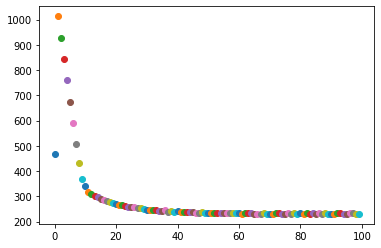

In [123]:
classifier = train_logistic(X_train, Y_train, alpha= .00003, no_of_iteration = 100)

In [124]:
print(classifier.shape)

(784, 26)


In [125]:
Z1 = (X_test@classifier)
probability = 1/(1+np.exp(-Z1))

In [126]:
n3 = np.size(X_test, 0)
test_cost = -(1/n3)*(np.sum((Y_test.T)@(np.log(probability)) + ((1-Y_test).T)@(np.log(probability))))
print(test_cost)

3613.651051031891


In [127]:
class_pred = probability.argmax(axis=1)
class_pred = class_pred +1
n3 = np.size(X_test,0)


In [128]:
class_pred.shape = (n3, 1)

In [129]:
print(class_pred)

[[24]
 [ 1]
 [15]
 ...
 [19]
 [10]
 [ 1]]


In [130]:
Y_label = Y_test.argmax(axis=1)
Y_label.shape = (14799, 1)

In [131]:
Y_label = Y_label + 1

In [132]:
def accuracy(Y_pred, Y):
  n = np.size(Y, 0)
  j=0
  for i in range(n):
    if Y_pred[i] == Y[i]:
      j = j+1

  return j/n

In [133]:
accuracy(class_pred, Y_label)

0.590648016757889